<a href="https://colab.research.google.com/github/ranajay531/StockPricePredictor/blob/main/StockPricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem**: To predict the closing prices of various stocks

In [ ]:
# Market data from Yahoo
!pip install yfinance


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing deep learning libraries
import tensorflow as tf
from tensorflow import keras
from keras import Input
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU

# Importing other libraries
import yfinance as yf # Yfinance will provide an API to access the current stock market data
from sklearn.model_selection import train_test_split # Machine Learning Library for classical ML

%matplotlib inline

In [ ]:
# Getting data
company = 'GOOG' # ** CHANGE FOR DIFFERENT COMPANY STOCKS **
stock_data = yf.Ticker(company)

# Getting stock history (all daily stock data)
stock_history = stock_data.history(period='max',interval='1d')

# Looking at what the data is
stock_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.490664,2.591785,2.390042,2.499133,897427216,0.0,0.0
2004-08-20 00:00:00-04:00,2.515820,2.716817,2.503118,2.697639,458857488,0.0,0.0
2004-08-23 00:00:00-04:00,2.758411,2.826406,2.716070,2.724787,366857939,0.0,0.0
2004-08-24 00:00:00-04:00,2.770615,2.779581,2.579581,2.611960,306396159,0.0,0.0
2004-08-25 00:00:00-04:00,2.614201,2.689918,2.587302,2.640104,184645512,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-12 00:00:00-05:00,144.339996,144.740005,143.360001,144.240005,13995200,0.0,0.0
2024-01-16 00:00:00-05:00,143.429993,145.839996,143.056000,144.080002,19198900,0.0,0.0
2024-01-17 00:00:00-05:00,142.910004,143.410004,140.509995,142.889999,17884500,0.0,0.0


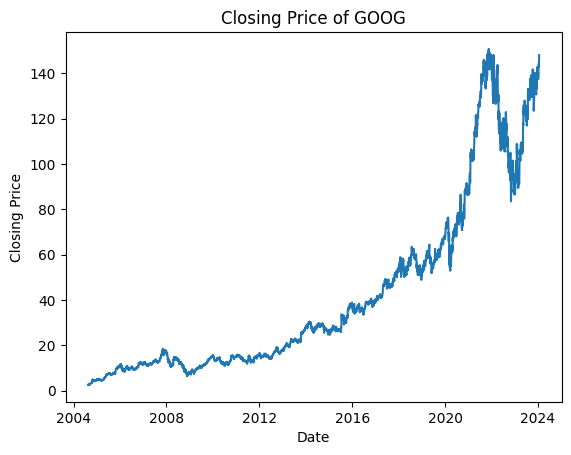

In [ ]:
closing_prices = stock_history['Close']
plt.title(f'Closing Price of {company}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(closing_prices)
plt.show()

In [ ]:
#Setting training and testing Data (80/20 split)
training_data, testing_data = train_test_split(stock_history,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
X_train = training_data.drop(['Close','Volume','Dividends','Stock Splits'],axis=1)
y_train = training_data['Close']

X_test = testing_data.drop(['Close','Volume','Dividends','Stock Splits'],axis=1)
y_test = testing_data['Close']

**Base Model: Artificial Neural Network**

In [ ]:
# Building the model
ann_model = Sequential()
ann_model.add(Dense(25,activation='relu',kernel_initializer='he_normal',bias_initializer='ones',input_shape=(X_train.shape[1],1)))

ann_model.add(Dropout(rate=0.2))
ann_model.add(Dense(50,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
ann_model.add(Dropout(rate=0.2))
ann_model.add(Dense(25,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
ann_model.add(Dense(1,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))

ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3, 25)             50        
                                                                 
 dropout (Dropout)           (None, 3, 25)             0         
                                                                 
 dense_1 (Dense)             (None, 3, 50)             1300      
                                                                 
 dropout_1 (Dropout)         (None, 3, 50)             0         
                                                                 
 dense_2 (Dense)             (None, 3, 25)             1275      
                                                                 
 dense_3 (Dense)             (None, 3, 1)              26        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10

In [ ]:
# Training the model
optimizer = keras.optimizers.SGD(learning_rate=0.03)
loss_function = keras.losses.MeanSquaredError()
ann_model.compile(optimizer=optimizer,loss=loss_function)

In [ ]:
# Model training
history = ann_model.fit(X_train,y_train,batch_size=32,epochs=5,shuffle=True)

Epoch 1/5
123/123 [==============================] - 4s 4ms/step - loss: 3293.1396
Epoch 2/5
123/123 [==============================] - 1s 4ms/step - loss: 3305.2424
Epoch 3/5
123/123 [==============================] - 1s 4ms/step - loss: 3305.2422
Epoch 4/5
123/123 [==============================] - 1s 5ms/step - loss: 3305.2405
Epoch 5/5
123/123 [==============================] - 1s 5ms/step - loss: 3305.2422


In [ ]:
# Evaluating model performance
training_loss = ann_model.evaluate(X_train,y_train,batch_size=32,verbose=0)

print(f'Training Loss: ${np.sqrt(training_loss)}')

Training Loss: $57.49122937525449


In [ ]:
# Evaluating model performance on the test set
testing_loss = ann_model.evaluate(X_test,y_test,batch_size=32,verbose=0)
print(f'Testing Loss: ${np.sqrt(testing_loss)}')

Testing Loss: $57.82954985072511


**Sequence Data**

In [ ]:
raw_sequence_data_X = []
raw_sequence_data_Y = []
data_list = stock_history.drop(['Volume','Dividends','Stock Splits'],axis=1).values
# Iterating through each example in the stock data
for i in range(len(data_list)):
  sequence = [[0]*4] * 30 # creating a list of ten zeros

  # Checking if there are 10 days worth of past stock data
  if i < 30:
    for x in range(i):
      sequence[x] = list(data_list[x])
  else:
    index = 0
    for x in range(i-30,i):
      sequence[index] = list(data_list[x])
      index += 1
  raw_sequence_data_X.append(sequence)
  raw_sequence_data_Y.append(data_list[i][3])

In [ ]:
# Changing the lists into numpy arrays
sequence_X = np.array(raw_sequence_data_X)
sequence_Y = np.array(raw_sequence_data_Y)

# Checking the shape
sequence_X.shape

(4888, 30, 4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sequence_X,sequence_Y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
# Implementing RNN model
rnn_model = Sequential()

rnn_model.add(SimpleRNN(50,activation='tanh',bias_initializer='ones',return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])))

rnn_model.add(Dense(25,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
rnn_model.add(Dense(1,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))

rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2750      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 4051 (15.82 KB)
Trainable params: 4051 (15.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Recurrent Neural Networks (RNN)**

In [ ]:
# Training the model
optimizer = keras.optimizers.SGD(learning_rate=0.001)
loss_function = keras.losses.MeanSquaredError()
rnn_model.compile(optimizer=optimizer,loss=loss_function)

In [ ]:
# Model training
history = rnn_model.fit(X_train,y_train,batch_size=32,epochs=5,shuffle=True)

Epoch 1/5
123/123 [==============================] - 3s 19ms/step - loss: 1613.3673
Epoch 2/5
123/123 [==============================] - 2s 20ms/step - loss: 1570.1179
Epoch 3/5
123/123 [==============================] - 3s 28ms/step - loss: 1572.0938
Epoch 4/5
123/123 [==============================] - 2s 19ms/step - loss: 1605.2174
Epoch 5/5
123/123 [==============================] - 2s 19ms/step - loss: 1578.3854


In [ ]:
# Evaluating model performance
training_loss = rnn_model.evaluate(X_train,y_train,batch_size=32,verbose=0)
print(f'Training Loss: ${np.sqrt(training_loss)}')

Training Loss: $41.855216292110775


In [ ]:
# Evaluating model performance on test set
testing_loss = rnn_model.evaluate(X_test,y_test,batch_size=32,verbose=0)
print(f'Testing Loss: ${np.sqrt(testing_loss)}')

Testing Loss: $42.58924596738375


**Gated Recurrent Unit (GRU)**

In [ ]:
# Building the GRU model
gru_model = Sequential()
gru_model.add(GRU(50,activation='tanh',bias_initializer='ones',return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])))

gru_model.add(Dense(25,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
gru_model.add(Dense(1,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))

gru_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                8400      
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 9701 (37.89 KB)
Trainable params: 9701 (37.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
optimizer = keras.optimizers.SGD(learning_rate=0.001)
loss_function = keras.losses.MeanSquaredError()
gru_model.compile(optimizer=optimizer,loss=loss_function)

In [ ]:
# Model training
history = gru_model.fit(X_train,y_train,batch_size=32,epochs=5,shuffle=True)

Epoch 1/5
123/123 [==============================] - 2s 5ms/step - loss: 3305.2417
Epoch 2/5
123/123 [==============================] - 1s 5ms/step - loss: 3305.2419
Epoch 3/5
123/123 [==============================] - 1s 5ms/step - loss: 3305.2412
Epoch 4/5
123/123 [==============================] - 1s 6ms/step - loss: 3305.2412
Epoch 5/5
123/123 [==============================] - 1s 6ms/step - loss: 3305.2415


In [ ]:
# Evaluating model performance
training_loss = gru_model.evaluate(X_train,y_train,batch_size=32,verbose=0)
print(f'Training Loss: ${np.sqrt(training_loss)}')

Training Loss: $57.49122937525449


In [ ]:
# Evaluating model performance on test set
testing_loss = gru_model.evaluate(X_test,y_test,batch_size=32,verbose=0)
print(f'Testing Loss: ${np.sqrt(testing_loss)}')

Testing Loss: $57.82954985072511


**Long Short Term Memory (LSTM)**

In [ ]:
# Building the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(30,activation='tanh',recurrent_activation='sigmoid',bias_initializer='ones',return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])))

lstm_model.add(Dense(25,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
lstm_model.add(Dense(1,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))

lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                4200      
                                                                 
 dense_8 (Dense)             (None, 25)                775       
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 5001 (19.54 KB)
Trainable params: 5001 (19.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
optimizer = keras.optimizers.SGD(learning_rate=0.001)
loss_function = keras.losses.MeanSquaredError()
lstm_model.compile(optimizer=optimizer,loss=loss_function)

In [ ]:
# Model training
history = lstm_model.fit(X_train,y_train,batch_size=32,epochs=5,shuffle=True)

Epoch 1/5
123/123 [==============================] - 3s 5ms/step - loss: 1614.9349
Epoch 2/5
123/123 [==============================] - 1s 5ms/step - loss: 1548.8180
Epoch 3/5
123/123 [==============================] - 1s 5ms/step - loss: 1540.6145
Epoch 4/5
123/123 [==============================] - 1s 5ms/step - loss: 1564.1364
Epoch 5/5
123/123 [==============================] - 1s 5ms/step - loss: 1535.5112


In [ ]:
# Evaluating model performance
training_loss = lstm_model.evaluate(X_train,y_train,batch_size=32,verbose=0)
print(f'Training: ${np.sqrt(training_loss)}')

Training Loss: $39.10576666334679


In [ ]:
# Evaluating model performance on test set
testing_loss = lstm_model.evaluate(X_test,y_test,batch_size=32,verbose=0)
print(f'Testing Loss: ${np.sqrt(testing_loss)}')

Testing Loss: $40.014310184373414
